<a href="https://colab.research.google.com/github/guluzar-gb/sentiment_analysis_NLP/blob/main/NLP_Sentiment_Analysis_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
!pip install gensim
!pip install contractions
!pip install autocorrect
!pip install scikit-plot

In [2]:
import pandas as pd
from gensim.models import Word2Vec
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import nltk.corpus
import sklearn
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import contractions
from autocorrect import Speller
from nltk import NaiveBayesClassifier
from nltk.corpus import wordnet
from nltk import pos_tag
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from scikitplot.metrics import plot_roc, plot_precision_recall
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore");
plt.rcParams["figure.figsize"] = (9,5)
pd.set_option('display.max_columns', 50)

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Data Wrangling

In [4]:
df0 = pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv')
df=df0.copy()


In [5]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [6]:
# # of many columns
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [7]:
# check the shape of the dataset
df.shape

(23486, 11)

In [8]:
# Count the number of unique values in each column
df.nunique()

Unnamed: 0                 23486
Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [9]:
# Count the number of nulls in each column
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [10]:
# drop all non values
df.dropna(inplace=True)


In [11]:
# reseat the index after droping some rows
df.reset_index(drop=True, inplace=True)
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [12]:
# Check for the missing values after droping the null values
df.isnull().sum()


Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [13]:
# to remove spaces in columns and replace them with underscore
df.columns= df.columns.str.replace(" ", "_")

In [14]:
# # of columns
df.columns

Index(['Unnamed:_0', 'Clothing_ID', 'Age', 'Title', 'Review_Text', 'Rating',
       'Recommended_IND', 'Positive_Feedback_Count', 'Division_Name',
       'Department_Name', 'Class_Name'],
      dtype='object')

In [15]:
# check the shape of the dataset
df.shape

(19662, 11)

In [16]:
# Count the number of unique values in each column
df.nunique()

Unnamed:_0                 19662
Clothing_ID                 1095
Age                           77
Title                      13983
Review_Text                19656
Rating                         5
Recommended_IND                2
Positive_Feedback_Count       79
Division_Name                  3
Department_Name                6
Class_Name                    20
dtype: int64

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [17]:
df["Recommended_IND"].value_counts(normalize=True)

1    0.818177
0    0.181823
Name: Recommended_IND, dtype: float64

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [19]:
# drop unnecessary columns
df=df[["Review_Text", 'Recommended_IND']]
df.head()


,Review_Text,Recommended_IND
0,I had such high hopes for this dress and reall...,0
1,"I love, love, love this jumpsuit. it's fun, fl...",1
2,This shirt is very flattering to all due to th...,1
3,"I love tracy reese dresses, but this one is no...",0
4,I aded this in my basket at hte last mintue to...,1


In [20]:
# Count the number of nulls in each column
df.isna().sum()

Review_Text        0
Recommended_IND    0
dtype: int64

In [21]:
# drop all non values
df.dropna(inplace=True)


In [22]:
# reseat the index after droping some rows
df.reset_index(drop=True, inplace=True)
df.head()

,Review_Text,Recommended_IND
0,I had such high hopes for this dress and reall...,0
1,"I love, love, love this jumpsuit. it's fun, fl...",1
2,This shirt is very flattering to all due to th...,1
3,"I love tracy reese dresses, but this one is no...",0
4,I aded this in my basket at hte last mintue to...,1


In [23]:
# Check for the missing values after droping the null values
df.isnull().sum()


Review_Text        0
Recommended_IND    0
dtype: int64

In [24]:
df.Recommended_IND.value_counts()

1    16087
0     3575
Name: Recommended_IND, dtype: int64

In [26]:
df.head()

,Review_Text,Recommended_IND
0,I had such high hopes for this dress and reall...,0
1,"I love, love, love this jumpsuit. it's fun, fl...",1
2,This shirt is very flattering to all due to th...,1
3,"I love tracy reese dresses, but this one is no...",0
4,I aded this in my basket at hte last mintue to...,1


---
---


### Missing Value Detection

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [27]:
stop_words = stopwords.words("english") #(for sentiment analysis, keep no, not)

for i in ["not", "no"]:
  stop_words.remove(i)

In [28]:
def cleaning(data):

    #1. Removing URLS
    # data = re.sub('http\S*', '', data).strip()
    # data = re.sub('www\S*', '', data).strip()

    #2. Removing Tags
    # data = re.sub('#\S*', '', data).strip()

    #3. Removing Mentions
    # data = re.sub('@\S*', '', data).strip()

    # #4. Correction of text
    # spell=Speller(fast=True)
    # correction_data=spell(data)

    #5. Contraction of text
    # contraction_data=contractions.fix(correction_data)
    contraction_data=contractions.fix(data)

    #6. Tokenize and lowercase
    text_tokens = word_tokenize(contraction_data.lower())
    # text_tokens = word_tokenize(correction_data.lower())

    #7. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #8. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #9. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #10. joining
    return " ".join(text_cleaned)

In [29]:
%%time
cleaning_text = df["Review_Text"].apply(cleaning)
cleaning_text.head()

CPU times: user 28.9 s, sys: 205 ms, total: 29.1 s
Wall time: 43.4 s


0    high hope dress really wanted work initially o...
1    love love love jumpsuit fun flirty fabulous ev...
2    shirt flattering due adjustable front tie perf...
3    love tracy reese dress one not petite foot tal...
4    aded basket hte last mintue see would look lik...
Name: Review_Text, dtype: object

In [30]:
df["cleaning_text"] = cleaning_text

In [31]:
df

,Review_Text,Recommended_IND,cleaning_text
0,I had such high hopes for this dress and reall...,0,high hope dress really wanted work initially o...
1,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...
2,This shirt is very flattering to all due to th...,1,shirt flattering due adjustable front tie perf...
3,"I love tracy reese dresses, but this one is no...",0,love tracy reese dress one not petite foot tal...
4,I aded this in my basket at hte last mintue to...,1,aded basket hte last mintue see would look lik...
...,...,...,...
19657,I was very happy to snag this dress at such a ...,1,happy snag dress great price easy slip flatter...
19658,"It reminds me of maternity clothes. soft, stre...",1,reminds maternity clothes soft stretchy shiny ...
19659,"This fit well, but the top was very see throug...",0,fit well top see never would worked glad able ...
19660,I bought this dress for a wedding i have this ...,1,bought dress wedding summer cute unfortunately...


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [32]:
df_cld=df[["cleaning_text", "Recommended_IND"]]

In [33]:
positive_reviews = df_cld[df_cld['Recommended_IND'] == 1]
positive_reviews

,cleaning_text,Recommended_IND
1,love love love jumpsuit fun flirty fabulous ev...,1
2,shirt flattering due adjustable front tie perf...,1
4,aded basket hte last mintue see would look lik...,1
5,ordered carbon store pick ton stuff always try...,1
6,love dress usually get x run little snug bust ...,1
...,...,...
19656,not sure ordering skirt could not see person f...,1
19657,happy snag dress great price easy slip flatter...,1
19658,reminds maternity clothes soft stretchy shiny ...,1
19660,bought dress wedding summer cute unfortunately...,1


In [34]:
negative_reviews = df_cld[df_cld['Recommended_IND'] == 0]
negative_reviews

,cleaning_text,Recommended_IND
0,high hope dress really wanted work initially o...,0
3,love tracy reese dress one not petite foot tal...,0
8,dress run small esp zipper area run ordered sp...,0
19,first not pullover styling side zipper would n...,0
22,loved material not really look long dress purc...,0
...,...,...
19628,really wanted like dress encouraged positive r...,0
19630,tried color really pretty fun want pair pant l...,0
19638,purchased good price typically love maeve fabr...,0
19655,surprised positive review product terrible cut...,0


### Collect Words (positive and negative separately)

In [35]:
recommended_words = ' '.join(positive_reviews['cleaning_text'])

In [36]:
not_recommended_words = ' '.join(negative_reviews['cleaning_text'])

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

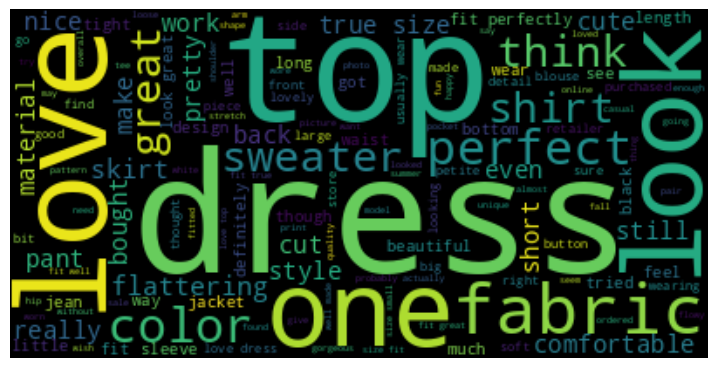

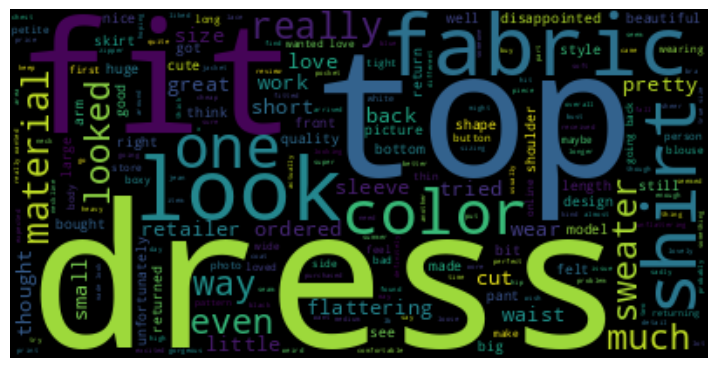

In [38]:
# Create word cloud for recommended reviews
recommended_wordcloud = WordCloud().generate(recommended_words)
plt.imshow(recommended_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Create word cloud for not recommended reviews
not_recommended_wordcloud = WordCloud().generate(not_recommended_words)
plt.imshow(not_recommended_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [39]:
df2=df[["Review_Text", "Recommended_IND"]]

In [40]:
df2.head()

,Review_Text,Recommended_IND
0,I had such high hopes for this dress and reall...,0
1,"I love, love, love this jumpsuit. it's fun, fl...",1
2,This shirt is very flattering to all due to th...,1
3,"I love tracy reese dresses, but this one is no...",0
4,I aded this in my basket at hte last mintue to...,1


In [41]:
X = df2["Review_Text"].values
y = df2["Recommended_IND"].map({0:1, 1:0}).values

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [43]:
%%time
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3, max_df=0.95)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

CPU times: user 17.7 s, sys: 52.2 ms, total: 17.7 s
Wall time: 17.8 s


### TF-IDF

In [46]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
%%time
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3, max_df=0.95)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

CPU times: user 19.2 s, sys: 52.7 ms, total: 19.3 s
Wall time: 19.4 s


### Eval Function

In [50]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [53]:
!pip install scikit-plot

In [54]:
log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

In [55]:
print("LOG MODEL BALANCED")
eval(log, X_train_count, X_test_count)

LOG MODEL BALANCED
[[2069  345]
 [  73  463]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2414
           1       0.57      0.86      0.69       536

    accuracy                           0.86      2950
   macro avg       0.77      0.86      0.80      2950
weighted avg       0.89      0.86      0.87      2950

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     13673
           1       0.59      0.90      0.71      3039

    accuracy                           0.87     16712
   macro avg       0.78      0.88      0.81     16712
weighted avg       0.90      0.87      0.88     16712



In [56]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring= ["accuracy", "f1", "recall", "precision"]

model = LogisticRegression(C =0.02,
                           max_iter=1000,
                           class_weight= "balanced",
                           random_state=101)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.848193
train_accuracy     0.867813
test_f1            0.668013
train_f1           0.711598
test_recall        0.839751
train_recall       0.896786
test_precision     0.554823
train_precision    0.589807
dtype: float64

In [57]:
model = LogisticRegression(C = 0.02, max_iter=1000)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.873563
train_accuracy     0.886622
test_f1            0.559216
train_f1           0.609094
test_recall        0.441579
train_recall       0.485759
test_precision     0.763247
train_precision    0.816406
dtype: float64

In [58]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

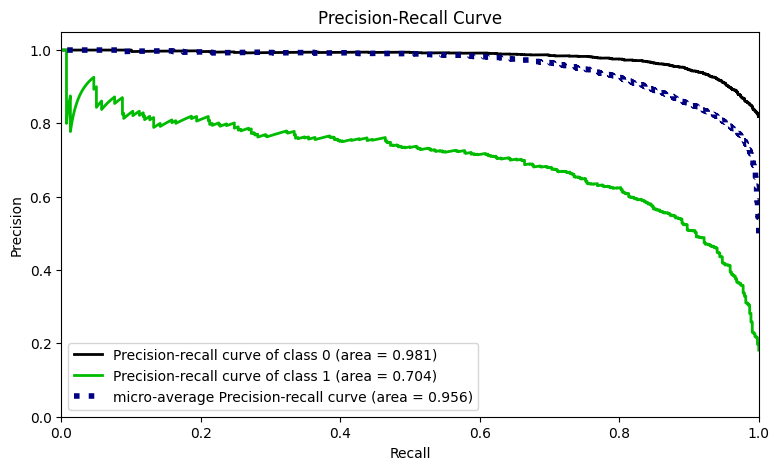

In [59]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LogisticRegression(C = 0.02, max_iter=1000)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [60]:
y_pred = log.predict(X_test_count)
y_pred_proba= log.predict_proba(X_test_count)[:,1]

log_AP_count = average_precision_score(y_test, y_pred_proba)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [62]:
log = LogisticRegression(C=0.04, max_iter=1000, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.04, class_weight='balanced', max_iter=1000)

In [63]:
print("LOG MODEL BALANCED")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL BALANCED
[[2007  407]
 [  75  461]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2414
           1       0.53      0.86      0.66       536

    accuracy                           0.84      2950
   macro avg       0.75      0.85      0.77      2950
weighted avg       0.89      0.84      0.85      2950

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.83      0.89     13673
           1       0.53      0.88      0.66      3039

    accuracy                           0.84     16712
   macro avg       0.75      0.85      0.78     16712
weighted avg       0.89      0.84      0.85     16712



In [64]:
model = LogisticRegression(C=0.02, max_iter=1000)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.818155
train_accuracy     0.818155
test_f1            0.000000
train_f1           0.000000
test_recall        0.000000
train_recall       0.000000
test_precision     0.000000
train_precision    0.000000
dtype: float64

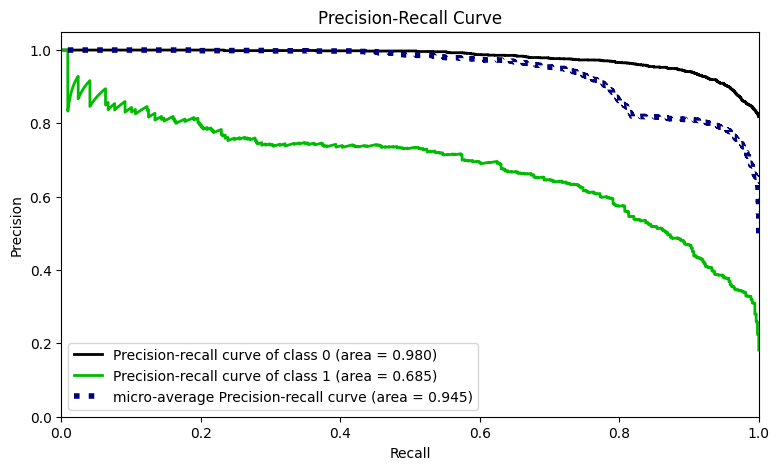

In [65]:
model = LogisticRegression(C=0.02, max_iter=1000)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [68]:
y_pred = log.predict(X_test_tf_idf)
y_pred_proba= log.predict_proba(X_test_tf_idf)[:,1]


log_AP_tfidf = average_precision_score(y_test, y_pred_proba)
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes


### Countvectorizer

In [69]:
nb = BernoulliNB(alpha=1)  #Alpha arttikca recall cok dustu
nb.fit(X_train_count,y_train)

BernoulliNB(alpha=1)

In [70]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[2203  211]
 [ 139  397]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2414
           1       0.65      0.74      0.69       536

    accuracy                           0.88      2950
   macro avg       0.80      0.83      0.81      2950
weighted avg       0.89      0.88      0.88      2950

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     13673
           1       0.68      0.79      0.73      3039

    accuracy                           0.89     16712
   macro avg       0.81      0.85      0.83     16712
weighted avg       0.90      0.89      0.90     16712



In [71]:
#cross validation

model = BernoulliNB(alpha=1)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.872846
train_accuracy     0.895145
test_f1            0.673778
train_f1           0.731819
test_recall        0.721950
train_recall       0.786735
test_precision     0.631988
train_precision    0.684074
dtype: float64

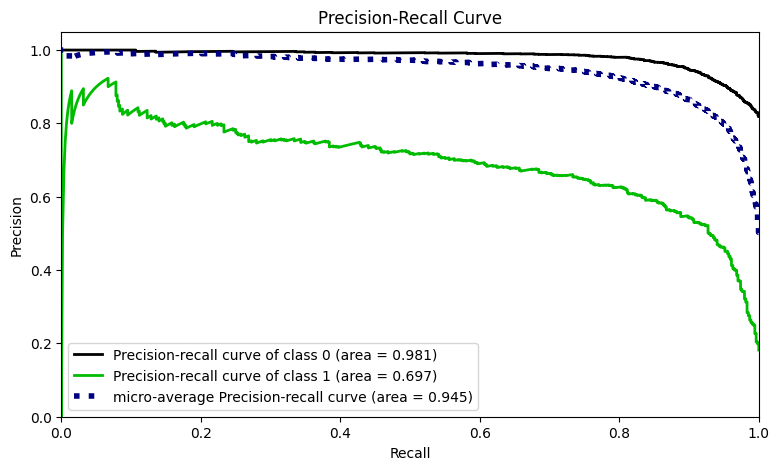

In [72]:
model = BernoulliNB(alpha=1)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [76]:
y_pred = nb.predict(X_test_count)
y_pred_proba= nb.predict_proba(X_test_count)[:,1]

nb_AP_count = average_precision_score(y_test, y_pred_proba)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [79]:
nb = BernoulliNB(alpha=1)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=1)

In [80]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[2203  211]
 [ 139  397]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2414
           1       0.65      0.74      0.69       536

    accuracy                           0.88      2950
   macro avg       0.80      0.83      0.81      2950
weighted avg       0.89      0.88      0.88      2950

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     13673
           1       0.68      0.79      0.73      3039

    accuracy                           0.89     16712
   macro avg       0.81      0.85      0.83     16712
weighted avg       0.90      0.89      0.90     16712



In [81]:
model = BernoulliNB(alpha=1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.872846
train_accuracy     0.895145
test_f1            0.673778
train_f1           0.731819
test_recall        0.721950
train_recall       0.786735
test_precision     0.631988
train_precision    0.684074
dtype: float64

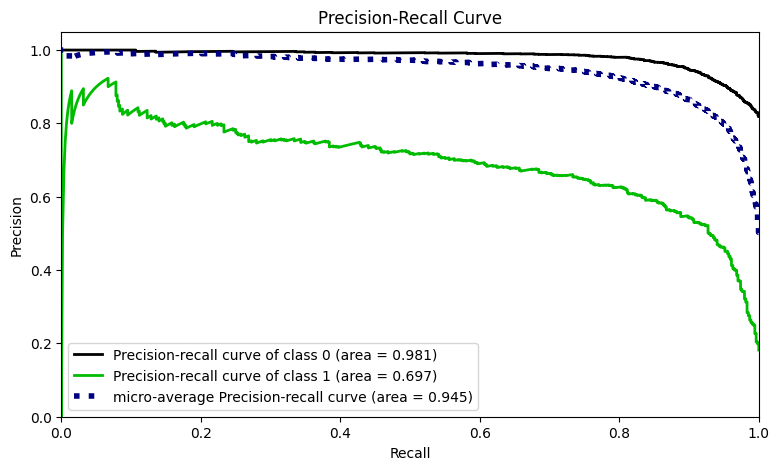

In [82]:
model = BernoulliNB(alpha=1)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [84]:
y_pred = nb.predict(X_test_tf_idf)
y_pred_proba= nb.predict_proba(X_test_tf_idf)[:,1]


nb_AP_tfidf = average_precision_score(y_test, y_pred_proba)
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)



## Countvectorizer

In [85]:
from sklearn.svm import LinearSVC   #SVC ile calistirdigimda running time cok uzun suruyor
svc = LinearSVC(C=0.05, class_weight="balanced") #, gamma=0.3, kernel= 'rbf', probability=True, class_weight="balanced")
svc.fit(X_train_count,y_train)

LinearSVC(C=0.05, class_weight='balanced')

In [86]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[2130  284]
 [ 103  433]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      2414
           1       0.60      0.81      0.69       536

    accuracy                           0.87      2950
   macro avg       0.78      0.85      0.80      2950
weighted avg       0.89      0.87      0.88      2950

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     13673
           1       0.71      0.96      0.81      3039

    accuracy                           0.92     16712
   macro avg       0.85      0.94      0.88     16712
weighted avg       0.94      0.92      0.92     16712



In [87]:
model = LinearSVC(C=0.05, class_weight="balanced") #SVC(C=0.1, gamma=0.3, kernel= 'rbf', probability=True, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.863452
train_accuracy     0.923448
test_f1            0.679179
train_f1           0.820643
test_recall        0.794011
train_recall       0.963036
test_precision     0.593679
train_precision    0.714943
dtype: float64

In [88]:
from scikitplot.metrics import plot_roc, plot_precision_recall
model = LinearSVC(C=0.1, class_weight="balanced") #SVC(C=0.1, gamma=0.3, kernel= 'rbf', probability=True, class_weight="balanced")

model.fit(X_train_count, y_train)

decision_function= model.decision_function(X_test_count) #1 sinifina ait mesafeleri cekioruz

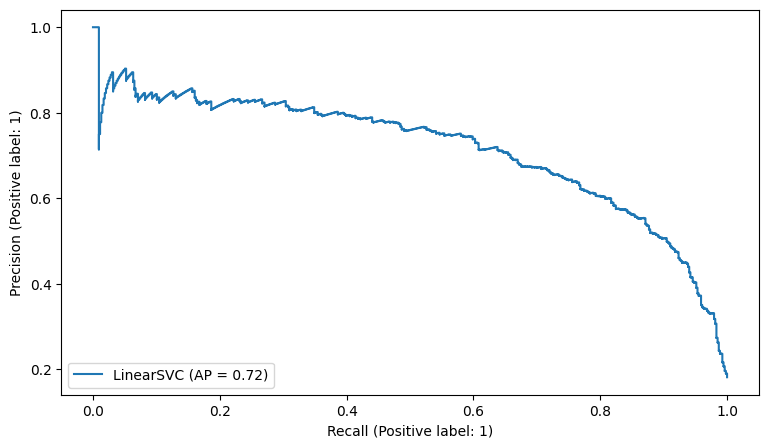

In [89]:
PrecisionRecallDisplay.from_estimator(svc,
                                      X_test_count,
                                      y_test);

In [90]:
y_pred = svc.predict(X_test_count)
decision_function= svc.decision_function(X_test_count)

svc_AP_count = average_precision_score(y_test, decision_function)
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [92]:
svc = LinearSVC(C=0.1, class_weight="balanced") #SVC(C=0.1, gamma=0.3, kernel= 'rbf', probability=True, class_weight="balanced")
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.1, class_weight='balanced')

In [93]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[2098  316]
 [  68  468]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      2414
           1       0.60      0.87      0.71       536

    accuracy                           0.87      2950
   macro avg       0.78      0.87      0.81      2950
weighted avg       0.90      0.87      0.88      2950

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     13673
           1       0.64      0.93      0.76      3039

    accuracy                           0.89     16712
   macro avg       0.81      0.91      0.84     16712
weighted avg       0.92      0.89      0.90     16712



In [94]:
model = LinearSVC(C=0.1, class_weight="balanced") #SVC(C=0.1, gamma=0.3, kernel= 'rbf', probability=True, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.859741
train_accuracy     0.891535
test_f1            0.688050
train_f1           0.758077
test_recall        0.850279
train_recall       0.934518
test_precision     0.578151
train_precision    0.637684
dtype: float64

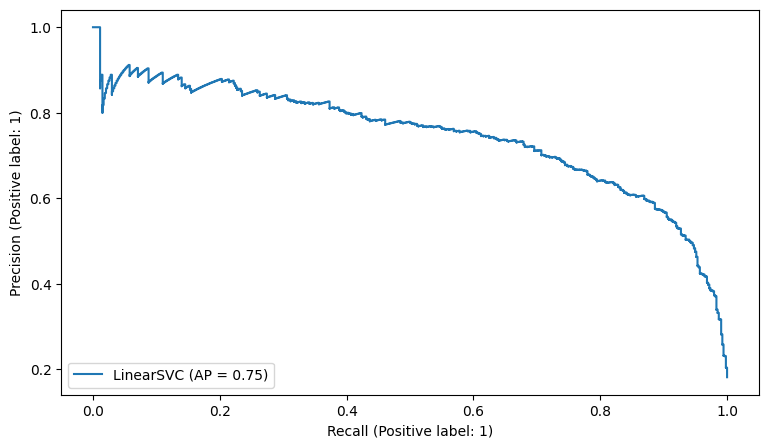

In [95]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LinearSVC(C=0.1, class_weight="balanced") #SVC(C=0.1, gamma=0.3, kernel= 'rbf', probability=True, class_weight="balanced")

model.fit(X_train_tf_idf, y_train)

decision_function = model.decision_function(X_test_tf_idf)

# plot_precision_recall(y_test, decision_function)
# plt.show();

PrecisionRecallDisplay.from_estimator(svc,
                                      X_test_tf_idf,
                                      y_test);

In [97]:
y_pred = svc.predict(X_test_tf_idf)
decision_function= svc.decision_function(X_test_tf_idf)

svc_AP_tfidf = average_precision_score(y_test, decision_function)
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [98]:
rf = RandomForestClassifier(150, max_depth = 20, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=150,
                       n_jobs=-1, random_state=42)

In [99]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[2180  234]
 [ 144  392]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2414
           1       0.63      0.73      0.67       536

    accuracy                           0.87      2950
   macro avg       0.78      0.82      0.80      2950
weighted avg       0.88      0.87      0.88      2950

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     13673
           1       0.78      0.94      0.85      3039

    accuracy                           0.94     16712
   macro avg       0.88      0.94      0.91     16712
weighted avg       0.95      0.94      0.94     16712



In [100]:
model = RandomForestClassifier(150, max_depth = 20, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.820009
train_accuracy     0.834836
test_f1            0.021377
train_f1           0.168008
test_recall        0.010857
train_recall       0.091733
test_precision     0.850000
train_precision    1.000000
dtype: float64

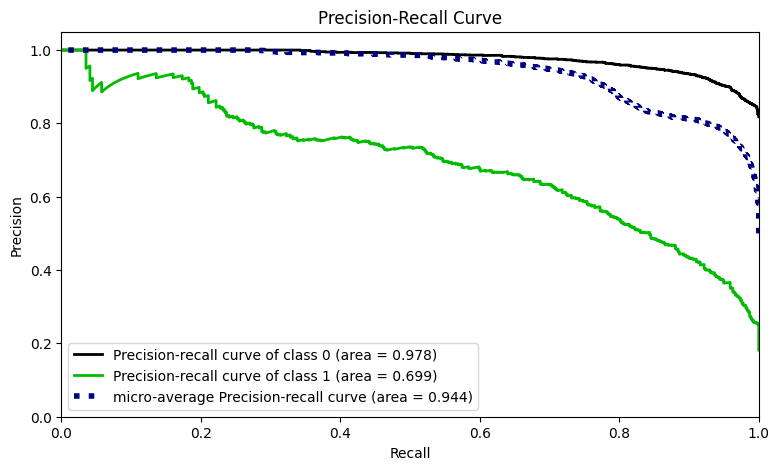

In [101]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [103]:
y_pred = rf.predict(X_test_count)
y_pred_proba= rf.predict_proba(X_test_count)[:,1]

rf_AP_count = average_precision_score(y_test, y_pred_proba)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [104]:
rf = RandomForestClassifier(150, max_depth=20, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=150,
                       n_jobs=-1, random_state=42)

In [105]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[2159  255]
 [ 170  366]]
Test_Set
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2414
           1       0.59      0.68      0.63       536

    accuracy                           0.86      2950
   macro avg       0.76      0.79      0.77      2950
weighted avg       0.87      0.86      0.86      2950

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     13673
           1       0.77      0.95      0.85      3039

    accuracy                           0.94     16712
   macro avg       0.88      0.95      0.91     16712
weighted avg       0.95      0.94      0.94     16712



In [106]:
model = RandomForestClassifier(150, max_depth=20, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.820309
train_accuracy     0.836039
test_f1            0.026511
train_f1           0.179043
test_recall        0.013490
train_recall       0.098351
test_precision     0.917778
train_precision    1.000000
dtype: float64

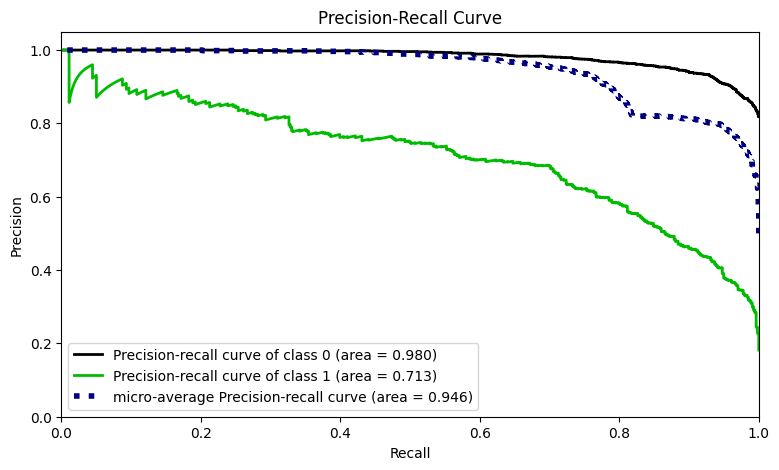

In [107]:
model = RandomForestClassifier(150, max_depth=20, random_state = 42, n_jobs = -1)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [109]:
y_pred = rf.predict(X_test_tf_idf)
y_pred_proba= rf.predict_proba(X_test_tf_idf)[:,1]

rf_AP_tfidf = average_precision_score(y_test, y_pred_proba)
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [110]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 150, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=150, random_state=42)

In [111]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[2291  123]
 [ 238  298]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2414
           1       0.71      0.56      0.62       536

    accuracy                           0.88      2950
   macro avg       0.81      0.75      0.77      2950
weighted avg       0.87      0.88      0.87      2950

Train_Set
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     13673
           1       0.73      0.56      0.63      3039

    accuracy                           0.88     16712
   macro avg       0.82      0.75      0.78     16712
weighted avg       0.87      0.88      0.88     16712



In [112]:
model = AdaBoostClassifier(n_estimators= 150, random_state = 42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy      0.871171
train_accuracy     0.883482
test_f1            0.596648
train_f1           0.635843
test_recall        0.524181
train_recall       0.559477
test_precision     0.692631
train_precision    0.736415
dtype: float64

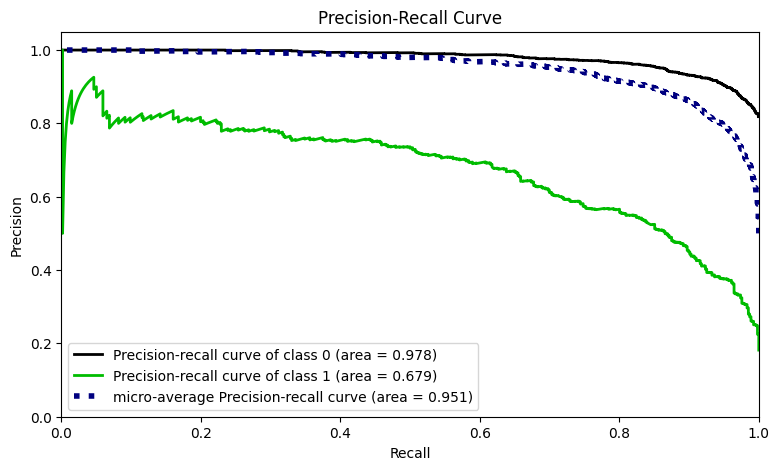

In [113]:
model = AdaBoostClassifier(n_estimators= 150, random_state = 42)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [115]:
y_pred = ada.predict(X_test_count)
y_pred_proba= ada.predict_proba(X_test_count)[:,1]

ada_AP_count = average_precision_score(y_test, y_pred_proba)
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [116]:
ada = AdaBoostClassifier(n_estimators= 150, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=150, random_state=42)

In [117]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[2290  124]
 [ 245  291]]
Test_Set
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      2414
           1       0.70      0.54      0.61       536

    accuracy                           0.87      2950
   macro avg       0.80      0.75      0.77      2950
weighted avg       0.87      0.87      0.87      2950

Train_Set
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     13673
           1       0.73      0.57      0.64      3039

    accuracy                           0.88     16712
   macro avg       0.82      0.76      0.79     16712
weighted avg       0.88      0.88      0.88     16712



In [118]:
model = AdaBoostClassifier(n_estimators= 150, random_state = 42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 3, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 4))
df_scores.mean()[2:]

test_accuracy      0.865905
train_accuracy     0.890797
test_f1            0.582872
train_f1           0.664939
test_recall        0.515301
train_recall       0.596084
test_precision     0.671142
train_precision    0.751960
dtype: float64

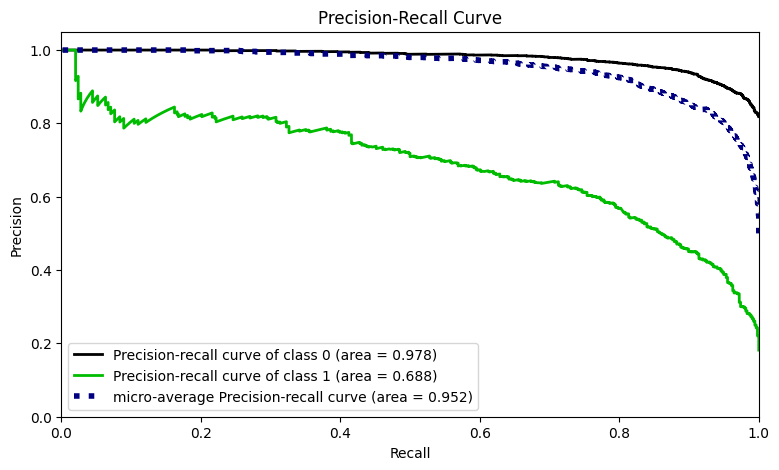

In [119]:
model = AdaBoostClassifier(n_estimators= 150, random_state = 42)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [121]:
y_pred = ada.predict(X_test_tf_idf)
y_pred_proba= ada.predict_proba(X_test_tf_idf)[:,1]

ada_AP_tfidf = average_precision_score(y_test, y_pred_proba)
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [122]:
df.head()

,Review_Text,Recommended_IND,cleaning_text
0,I had such high hopes for this dress and reall...,0,high hope dress really wanted work initially o...
1,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...
2,This shirt is very flattering to all due to th...,1,shirt flattering due adjustable front tie perf...
3,"I love tracy reese dresses, but this one is no...",0,love tracy reese dress one not petite foot tal...
4,I aded this in my basket at hte last mintue to...,1,aded basket hte last mintue see would look lik...


In [123]:
X = df['Review_Text']
y = df['Recommended_IND'].map({1:0, 0:1})

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=101)

In [125]:
X

0        I had such high hopes for this dress and reall...
1        I love, love, love this jumpsuit. it's fun, fl...
2        This shirt is very flattering to all due to th...
3        I love tracy reese dresses, but this one is no...
4        I aded this in my basket at hte last mintue to...
                               ...                        
19657    I was very happy to snag this dress at such a ...
19658    It reminds me of maternity clothes. soft, stre...
19659    This fit well, but the top was very see throug...
19660    I bought this dress for a wedding i have this ...
19661    This dress in a lovely platinum is feminine an...
Name: Review_Text, Length: 19662, dtype: object

In [126]:
y

0        1
1        0
2        0
3        1
4        0
        ..
19657    0
19658    0
19659    1
19660    0
19661    0
Name: Recommended_IND, Length: 19662, dtype: int64

### Tokenization

In [127]:
num_words = 15001

tokenizer = Tokenizer(num_words=num_words)

In [128]:
tokenizer.fit_on_texts(X_train)

### Creating word index

In [129]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'size': 21,
 'love': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'too': 34,
 'great': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'at': 43,
 'up': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'really': 50,
 'more': 51,
 'ordered': 52,
 'perfect': 53,
 'little': 54,
 'one': 55,
 'these': 56,
 'will': 57,
 'flattering': 58,
 'an': 59,
 'well': 60,
 'out': 61,
 'soft': 62,
 'back': 63,
 'because': 64,
 '\r': 65,
 'had': 66,
 'can': 67,
 'bought': 68,
 'comfortable': 69,
 'nice': 70,
 'cute': 71,
 'when': 72,
 'all': 73,
 'than': 74,
 'bit': 75,
 'looks': 76,
 'fits': 77,
 'which': 78,
 'down': 79,
 'be

In [130]:
len(tokenizer.word_index)

13580

### Converting tokens to numeric

In [131]:
X_train_num_tokens = tokenizer.texts_to_sequences(X_train)
X_test_num_tokens = tokenizer.texts_to_sequences(X_test)

In [133]:
len(X_train_num_tokens)

17695

### Maximum number of tokens for all documents¶

In [141]:
num_tokens = [len(sen_tokens) for sen_tokens in X_train_num_tokens]
num_tokens = np.array(num_tokens)


In [143]:
num_tokens.max()

115

In [144]:
num_tokens.argmax()

2578

In [145]:
X_train.iloc[2578]

"I love shift dresses and i love t linen so this one was a must for me. i had it in my inbox as soon as it came out on the website and then i found it in the store and had to try it on. i took the six and the eight to the fitting room because i run in between, and the six fit better so i guess it runs a little bit large. really it just depends on how you want it to fit. the length is great too, about 3 inches above my knee, i'm 5 foot 5, which is exactly where i like my dresses to hit. i got the"

In [146]:
len(X_train_num_tokens[2578])


115

In [147]:
max_tokens = 102

In [148]:
sum(num_tokens <= max_tokens) / len(num_tokens)

0.9530940943769426

In [149]:
sum(num_tokens <= max_tokens)

16865

In [150]:
len(num_tokens)

17695

### Fixing token counts of all documents (pad_sequences)

In [151]:
X_train_pad = pad_sequences(X_train_num_tokens, maxlen=max_tokens, padding="pre")
X_test_pad = pad_sequences(X_test_num_tokens, maxlen=max_tokens, padding="pre")

In [152]:
display(X_train_pad.shape)
display(X_test_pad.shape)

(17695, 102)

(1967, 102)

### Train Set Split

### Modeling

In [158]:
model = Sequential()

In [159]:
embedding_size = 50


In [160]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))


model.add(Dropout(0.1))

model.add(GRU(units=50, return_sequences=True))

model.add(Dropout(0.1))

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.1))

model.add(GRU(units=12, return_sequences=False))

model.add(Dense(1, activation='sigmoid'))

In [162]:
optimizer = Adam(learning_rate=0.005)

In [163]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

https://stats.stackexchange.com/questions/328926/how-many-parameters-are-in-a-gated-recurrent-unit-gru-recurrent-neural-network

In [164]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 102, 50)           750050    
                                                                 
 dropout (Dropout)           (None, 102, 50)           0         
                                                                 
 gru (GRU)                   (None, 102, 50)           15300     
                                                                 
 dropout_1 (Dropout)         (None, 102, 50)           0         
                                                                 
 gru_1 (GRU)                 (None, 102, 25)           5775      
                                                                 
 dropout_2 (Dropout)         (None, 102, 25)           0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [165]:
# weights = {0:0.18, 1:0.82}


from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',
                                                     y=y_train)

https://keras.io/getting_started/faq/#why-is-my-training-loss-much-higher-than-my-testing-loss

In [166]:
model.fit(X_train_pad,
          y_train,
          epochs=4,
          batch_size=256,
          sample_weight= classes_weights,
          validation_data=(X_test_pad, y_test))

Epoch 1/4
70/70 [==============================] - 26s 191ms/step - loss: 0.4925 - precision: 0.4010 - val_loss: 0.4355 - val_precision: 0.4622
Epoch 2/4
70/70 [==============================] - 9s 127ms/step - loss: 0.3018 - precision: 0.5838 - val_loss: 0.2835 - val_precision: 0.6454
Epoch 3/4
70/70 [==============================] - 7s 99ms/step - loss: 0.2183 - precision: 0.6761 - val_loss: 0.3068 - val_precision: 0.6309
Epoch 4/4
70/70 [==============================] - 5s 73ms/step - loss: 0.1723 - precision: 0.7334 - val_loss: 0.3233 - val_precision: 0.6894


### Model Evaluation

In [167]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,precision,val_loss,val_precision
0,0.492508,0.401026,0.435537,0.462151
1,0.301832,0.583769,0.283457,0.645435
2,0.218280,0.676122,0.306782,0.630928
3,0.172252,0.733412,0.323291,0.689394


<Axes: >

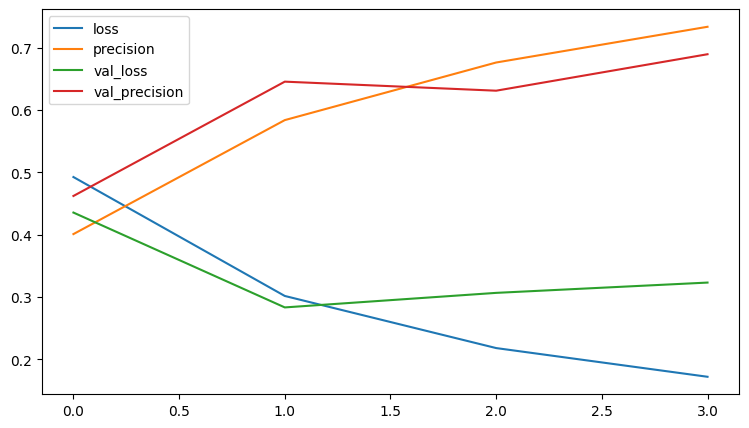

In [168]:
model_loss.plot()

In [169]:
model.evaluate(X_train_pad, y_train)

553/553 [==============================] - 4s 7ms/step - loss: 0.1159 - precision: 0.8445


[0.11590754985809326, 0.8444565534591675]

In [170]:
model.evaluate(X_test_pad, y_test)

62/62 [==============================] - 0s 7ms/step - loss: 0.3233 - precision: 0.6894


[0.3232909142971039, 0.689393937587738]

In [171]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test_pad) >= 0.5

print("TEST")
print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

62/62 [==============================] - 1s 6ms/step
TEST
[[1486  123]
 [  85  273]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1609
           1       0.69      0.76      0.72       358

    accuracy                           0.89      1967
   macro avg       0.82      0.84      0.83      1967
weighted avg       0.90      0.89      0.90      1967



In [172]:
y_train_pred = model.predict(X_train_pad) >= 0.5
print("TEST")
print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

553/553 [==============================] - 3s 6ms/step
TEST
[[13907   571]
 [  117  3100]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     14478
           1       0.84      0.96      0.90      3217

    accuracy                           0.96     17695
   macro avg       0.92      0.96      0.94     17695
weighted avg       0.96      0.96      0.96     17695



62/62 [==============================] - 0s 7ms/step


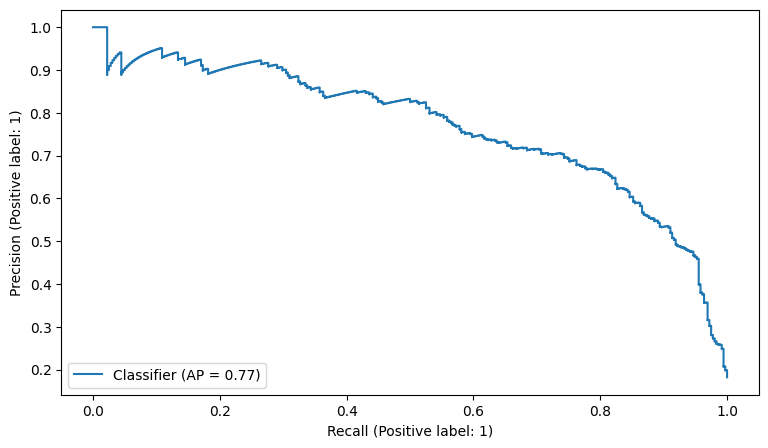

In [173]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test_pad)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [174]:
from sklearn.metrics import precision_recall_curve, average_precision_score

average_precision_score(y_test, y_pred_proba)

0.7687934289516559

In [175]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## Model Saving

In [176]:
model.save('sentiment_analysis_DL.h5')

## BERT Modeling

In [177]:
!pip install transformers

### Read Data

In [178]:
df

,Review_Text,Recommended_IND,cleaning_text
0,I had such high hopes for this dress and reall...,0,high hope dress really wanted work initially o...
1,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...
2,This shirt is very flattering to all due to th...,1,shirt flattering due adjustable front tie perf...
3,"I love tracy reese dresses, but this one is no...",0,love tracy reese dress one not petite foot tal...
4,I aded this in my basket at hte last mintue to...,1,aded basket hte last mintue see would look lik...
...,...,...,...
19657,I was very happy to snag this dress at such a ...,1,happy snag dress great price easy slip flatter...
19658,"It reminds me of maternity clothes. soft, stre...",1,reminds maternity clothes soft stretchy shiny ...
19659,"This fit well, but the top was very see throug...",0,fit well top see never would worked glad able ...
19660,I bought this dress for a wedding i have this ...,1,bought dress wedding summer cute unfortunately...


### Train test split

In [179]:
X = df['Review_Text'].values
y = df['Recommended_IND'].map({1:0, 0:1}).values

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.15,
                                                    stratify=y,
                                                    random_state=101)

### Tokenization

In [181]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

### Fixing token counts of all documents

In [182]:
# For every sentence
number_tokens_sentences = []
for sentence in X_train:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sentence,
                                 add_special_tokens=True)
    number_tokens_sentences.append(len(input_ids))


In [183]:
max(number_tokens_sentences)

162

In [184]:
sum(np.array(number_tokens_sentences) <= 130) / len(number_tokens_sentences)

0.9603877453326951

### Transformation Vectors to Matrices

In [186]:
def transformation(X):
  # max array dimension 130 olarak kuruldu (%96)
  seq_len = 130

  # input_ids'ler için Xids boş listesini, attention_mask'ler için Xmask boş listesini oluşturur
  Xids = []
  Xmask = []


  for sentence in X:

      tokens = tokenizer.encode_plus(sentence,
                                     max_length=seq_len,
                                     truncation=True,
                                     padding='max_length',
                                     add_special_tokens=True)
      # çektiğimiz herbir yorumu(sentence) vektörlere dönüştürüyoruz.

      # assign tokenized outputs to respective rows in numpy arrays
      Xids.append(tokens['input_ids'])
      Xmask.append(tokens['attention_mask'])

  return np.array(Xids), np.array(Xmask)

In [187]:
Xids_train, Xmask_train = transformation(X_train)


Xids_test, Xmask_test = transformation(X_test)

In [188]:
Xids_train

array([[  101,  1045,  2293, ...,     0,     0,     0],
       [  101, 21510, 14464, ...,     0,     0,     0],
       [  101,  1045,  2031, ...,     0,     0,     0],
       ...,
       [  101,  2043,  1045, ...,     0,     0,     0],
       [  101,  1996,  3797, ...,     0,     0,     0],
       [  101,  2428,  2066, ...,     0,     0,     0]])

In [189]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (16712, 130)
Xmask_train.shape : (16712, 130)
Xids_test.shape   : (2950, 130)
Xmask_test.shape  : (2950, 130)


In [190]:
y_train

array([0, 0, 1, ..., 0, 0, 1])

In [191]:
labels_train = y_train.reshape(-1,1)
labels_train

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [192]:
y_test

array([0, 0, 1, ..., 0, 0, 0])

In [193]:
labels_test = y_test.reshape(-1,1)
labels_test

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

### Transformation Matrix to Tensorflow tensor

In [203]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(130,), dtype=tf.int64, name=None), TensorSpec(shape=(130,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [204]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(130,), dtype=tf.int64, name=None), TensorSpec(shape=(130,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [205]:
#Yukarda elde ettigimiz Tensor vektorlerini isimlendirmemiz lazim, Label bir tane oldugu icin ekstra isimlendirmeye gerek yok.

def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [206]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [207]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(130,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(130,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [208]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(130,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(130,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [209]:
batch_size = 32


# batch_size
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)


https://www.tensorflow.org/tfmodels/nlp/fine_tune_bert

In [212]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.4/106.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 90.1 MB/s eta 0:00:00


In [213]:
print(len(train_ds))
print(len(train_ds)*3)
print(int(0.1*len(train_ds)*3))

523
1569
156


### Creating optimization

In [214]:
from official.nlp import optimization
epochs = 2
#batch_size = 32
steps_per_epoch = len(train_ds) # modelin eğitim aşamasında her epochda kaç iterasyon yapacağı (modele beslediğimiz 32'li paket sayısı.)

num_train_steps = steps_per_epoch * epochs # tüm eğitim boyunca modelin toplam kaç iterasyon yapacağı (modele beslediğimiz 32'li paket sayısı.)
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 0.0005 #2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw') #katsayidaki guncellemeyi adam daha buyuk yapar adamw ye gore

In [215]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

1046
104


### Creating Model with TPU

In [216]:
def create_model():
    from transformers import TFAutoModel #TFBertModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(130,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(130,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

#functional API de tuple icine degiskenleri vererek devam ederiz (embeddings), (x), ..
    x = Dense(10, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.2, name="dropout")(x)
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [217]:
strategy = tf.distribute.MirroredStrategy()
with strategy.scope():

  #from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall, Precision


  loss = BinaryCrossentropy()
  recall = Recall()
  # precision= Precision()
  model_b = create_model()
  model_b.compile(optimizer=optimizer, loss=loss, metrics=[recall])

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [218]:
model_b.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 130)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 130)]                0         []                            
 )                                                                                                
                                                                                                  
 bert (TFBertMainLayer)      TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
                             ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 130, 7                                       

### Model Fiting

In [220]:
# %%timeit
model_b.fit(train_ds, validation_data= val_ds, epochs=epochs)

Epoch 1/2
523/523 [==============================] - 481s 920ms/step - loss: 0.4970 - recall: 0.0155 - val_loss: 0.4827 - val_recall: 0.0000e+00
Epoch 2/2
523/523 [==============================] - 481s 919ms/step - loss: 0.4967 - recall: 0.0138 - val_loss: 0.4828 - val_recall: 0.0000e+00


## Model evaluation

In [221]:
model_loss = pd.DataFrame(model_b.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.496989,0.015466,0.482729,0.0
1,0.496731,0.013820,0.482775,0.0


<Axes: >

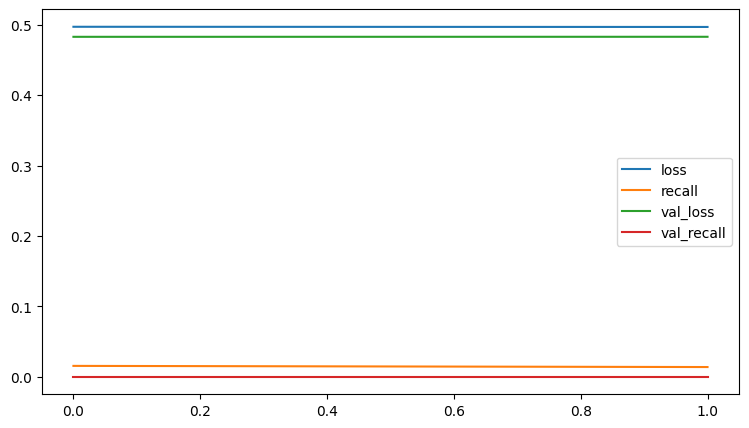

In [222]:
model_loss.plot()

In [223]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model_b.predict(val_ds) >= 0.5

print(classification_report(y_test, y_pred))

93/93 [==============================] - 30s 288ms/step
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2414
           1       0.00      0.00      0.00       536

    accuracy                           0.82      2950
   macro avg       0.41      0.50      0.45      2950
weighted avg       0.67      0.82      0.74      2950



In [224]:
y_train_pred = model_b.predict(train_ds) >= 0.5

print(classification_report(y_train, y_train_pred))

523/523 [==============================] - 151s 289ms/step
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     13673
           1       0.00      0.00      0.00      3039

    accuracy                           0.82     16712
   macro avg       0.41      0.50      0.45     16712
weighted avg       0.67      0.82      0.74     16712



93/93 [==============================] - 27s 287ms/step


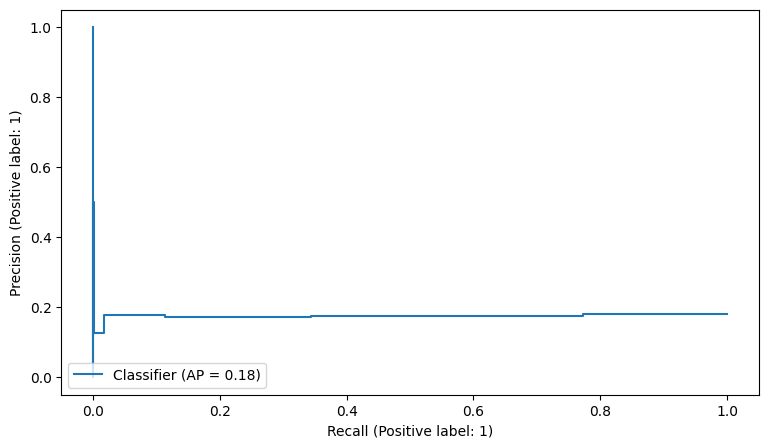

In [225]:
y_pred_proba = model_b.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [226]:
average_precision_score(y_test, y_pred_proba)

0.17590801319975183

In [227]:
BERT_AP = average_precision_score(y_test, y_pred_proba)
BERT_f1 = f1_score(y_test, y_pred)
BERT_rec = recall_score(y_test, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

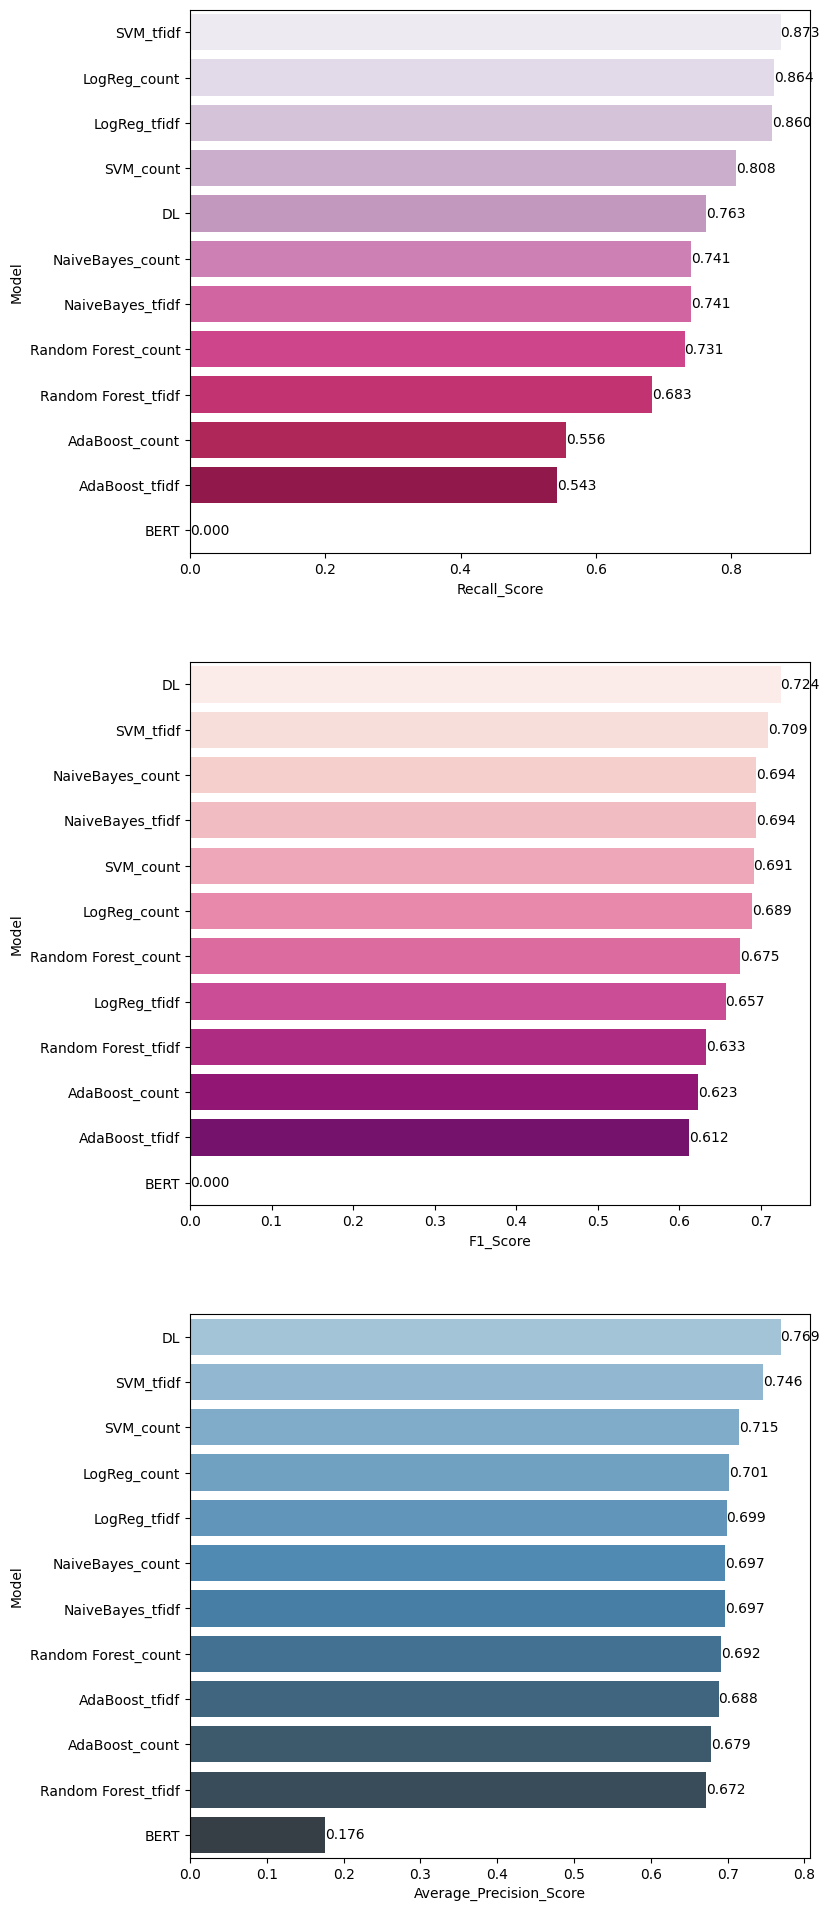

In [228]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT"],

                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1, rf_count_f1, ada_count_f1, nb_tfidf_f1,
                                     log_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_f1],

                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, rf_count_rec, ada_count_rec, nb_tfidf_rec,
                                         log_tfidf_rec, svc_tfidf_rec, rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_rec],

                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count, ada_AP_count, nb_AP_tfidf,
                                                    log_AP_tfidf, svc_AP_tfidf, rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_AP]})


plt.figure(figsize=(8,24))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score",
                              ascending=False)
ax=sns.barplot(x="Recall_Score",
               y="Model",
               data=compare,
               palette="PuRd")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score",
                              ascending=False)
ax=sns.barplot(x="F1_Score",
               y="Model",
               data=compare,
               palette="RdPu")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score",
                              ascending=False)
ax=sns.barplot(x="Average_Precision_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

### Conclusion

In [ ]:
# Modeller arasinda en iyi skorlar SVMtfidf ile elde edilmistir.
# Bu modelin kullanimi calisma maaliyetleri de goz onune alinarak degerlendirilmelidir.
#Bunun yaninda DL de yakin performans gostermistir.
#Makine performansi da goz onune alinarak fine-tuning ile farkli parametreler denenerek modellerin performansi yeniden degerlendirilebilir.
# Bazi modellerde calisma zamani cok uzun surdugu icin cross validation icin iterasyon sayisi azaltilmisitir.

#Bert modelinde running time cok uzun oldugu icin dense layer icin=10 kullanilmisitr. metrics olarak da Recall yerine Precision yazilmistir yanlislikla. Bunlar Bert modelindeki kotu skorlari aciklayabilir.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___